<a href="https://colab.research.google.com/github/AleksandrRevuka/HW_Data_Science/blob/main/Hw7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163755 sha256=b33482a79cfd970204dda5044545f4344c7808a5c388a5c800a98a7c4322fcff
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import Dataset, SVD, SVDpp, NMF, KNNBaseline, accuracy
from surprise.model_selection import GridSearchCV
from surprise.model_selection import ShuffleSplit

In [133]:
data = Dataset.load_builtin("ml-100k")

results_df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE'])

In [114]:
def evaluate_model(algo, name, results_df):
    ss = ShuffleSplit(n_splits=3, test_size=0.25)

    rmse_values = []
    mae_values = []

    for trainset, testset in ss.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)

        rmse = accuracy.rmse(predictions, verbose=True)
        mae = accuracy.mae(predictions, verbose=True)

        rmse_values.append(rmse)
        mae_values.append(mae)

        print("------------------")

    results_df = pd.concat([results_df, pd.DataFrame({'Model': [name], 'RMSE': [sum(rmse_values) / len(rmse_values)], 'MAE': [sum(mae_values) / len(mae_values)]})], ignore_index=True)
    return results_df

# Найдемо найкращі параметри для SVD:

In [101]:
param_grid = {"n_epochs": list(range(20, 24)), "lr_all": [0.03, 0.02, 0.01], "reg_all": [0.011, 0.1, 0.09]}
gs_svd = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs_svd.fit(data)

print(gs_svd.best_score)
print(gs_svd.best_params)

{'rmse': 0.9210223670703711, 'mae': 0.7282003158760822}
{'rmse': {'n_epochs': 23, 'lr_all': 0.02, 'reg_all': 0.1}, 'mae': {'n_epochs': 22, 'lr_all': 0.02, 'reg_all': 0.1}}


# проженемо наш датасет через модель з найкращими параметрами за допомогою базового ітератора перехресної перевірки з випадковими наборами і тестовими наборами:

In [134]:
results_df = evaluate_model(gs_svd.best_estimator["rmse"], "SVD", results_df)

RMSE: 0.9125
MAE:  0.7215
------------------
RMSE: 0.9165
MAE:  0.7231
------------------
RMSE: 0.9131
MAE:  0.7229
------------------


# Найдемо найкращі параметри для SVD++:

In [108]:
param_grid = {"n_epochs": list(range(16, 20)), "lr_all": [0.03, 0.02, 0.01], "reg_all": [0.011, 0.1, 0.09], "cache_ratings": [True]}
gs_svdpp = GridSearchCV(SVDpp, param_grid, measures=["rmse", "mae"], cv=3)

gs_svdpp.fit(data)

print(gs_svdpp.best_score)
print(gs_svdpp.best_params)


{'rmse': 0.9207110070812555, 'mae': 0.7279418089263837}
{'rmse': {'n_epochs': 16, 'lr_all': 0.02, 'reg_all': 0.1, 'cache_ratings': True}, 'mae': {'n_epochs': 16, 'lr_all': 0.02, 'reg_all': 0.1, 'cache_ratings': True}}


In [135]:
results_df = evaluate_model(gs_svdpp.best_estimator["rmse"], "SVD++", results_df)

RMSE: 0.9159
MAE:  0.7241
------------------
RMSE: 0.9147
MAE:  0.7228
------------------
RMSE: 0.9160
MAE:  0.7230
------------------


# Найдемо найкращі параметри для NMF:

In [128]:
param_grid = {"n_epochs": list(range(49, 52)), "biased": [True, False], "reg_pu": [0.04, 0.05, 0.06], "reg_qi": [0.03, 0.04, 0.05]}
gs_nmf = GridSearchCV(NMF, param_grid, measures=["rmse", "mae"], cv=3)

gs_nmf.fit(data)

print(gs_nmf.best_score)
print(gs_nmf.best_params)

{'rmse': 0.9435908029433345, 'mae': 0.7428278042884067}
{'rmse': {'n_epochs': 50, 'biased': True, 'reg_pu': 0.05, 'reg_qi': 0.04}, 'mae': {'n_epochs': 50, 'biased': True, 'reg_pu': 0.05, 'reg_qi': 0.04}}


In [136]:
results_df = evaluate_model(gs_nmf.best_estimator["rmse"], "NMF", results_df)

RMSE: 2.4685
MAE:  2.1378
------------------
RMSE: 1.3594
MAE:  1.0288
------------------
RMSE: 1.2485
MAE:  0.9642
------------------


# Найдемо найкращі параметри для KNNBaseline:

In [121]:
param_grid_KNNB = {
    'bsl_options': {
        'method': ['als'],
        'n_epochs': list(range(4, 8))
    },
    'k': list(range(35, 40)),
    'sim_options': {
        'name': ['pearson_baseline'],
        'user_based': [False, True]
    },
}

gs_knn = GridSearchCV(KNNBaseline, param_grid_KNNB, measures=["rmse", "mae"], cv=3)

gs_knn.fit(data)

print(gs_knn.best_score)
print(gs_knn.best_params)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

In [137]:
results_df = evaluate_model(gs_knn.best_estimator["rmse"], "KNNBaseline", results_df)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9206
MAE:  0.7216
------------------
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9179
MAE:  0.7191
------------------
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9278
MAE:  0.7282
------------------


In [138]:
results_df

,Model,RMSE,MAE
0,SVD,0.914045,0.722485
1,SVD++,0.915541,0.723301
2,NMF,1.692132,1.376940
3,KNNBaseline,0.922085,0.722935


<Figure size 1000x600 with 0 Axes>

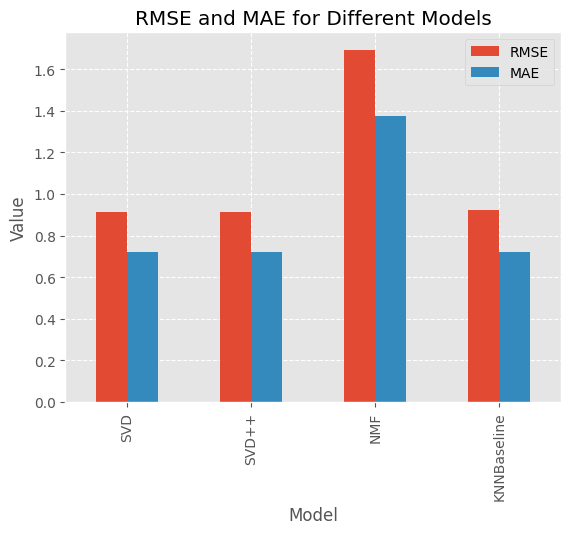

In [140]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', x='Model', y=['RMSE', 'MAE'])
plt.title('RMSE and MAE for Different Models')
plt.xlabel('Model')
plt.ylabel('Value')

plt.grid(linestyle='--')
plt.show()

# Висновки:

Найкраща модель SVD має найнижчий показник RMSE та  MAE серед інших моделей, що може вказувати на кращу загальну точність прогнозів для даного набору даних.

Моделі SVD++ та KNNBaseline показали подібний рівень точності до SVD. Модель NMF має вищі значення RMSE та MAE, що може вказувати на меншу точність цієї моделі на даному наборі даних.